# Import Libraries & Data Files

In [1]:
#import libraries
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
#import data file
path = r'/Users/oliviamurphy/Desktop/2022-01 Insta Cart Analysis/'
orders_products_departments_final = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','orders_products_departments_final_agg.pkl'))

In [3]:
# returns variable information for orders_products_departments_final
orders_products_departments_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32433030 entries, 0 to 32433029
Data columns (total 32 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   product_id                     string  
 1   product_name                   object  
 2   aisle_id                       string  
 3   department_id                  string  
 4   prices                         float64 
 5   order_id                       string  
 6   user_id                        string  
 7   order_number                   int64   
 8   orders_day_of_week             int64   
 9   order_hour_of_day              int64   
 10  days_passed_since_last_order   float64 
 11  add_to_cart_order              int64   
 12  reordered                      int64   
 13  gender                         object  
 14  state                          object  
 15  age                            int64   
 16  date_joined                    object  
 17  number_of_dependants     

# Average Spending by hour
##They also want to know whether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times.

Text(0, 0.5, 'Total Expenditure')

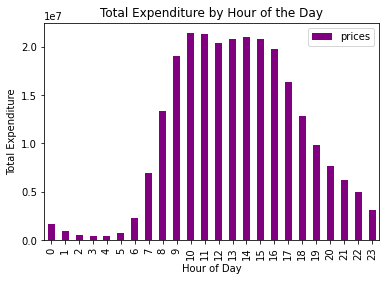

In [4]:
# plots total expenditure by hour of the day
expenditure_by_hour = orders_products_departments_final.groupby(['order_hour_of_day']).agg({'prices': 'sum'}).plot.bar(color = 'purple')
plt.title('Total Expenditure by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Expenditure')

In [5]:
# save expenditure_by_hour png
expenditure_by_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'expenditure_by_hour.png'))

# Bar Chart for New Price Tags
## Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

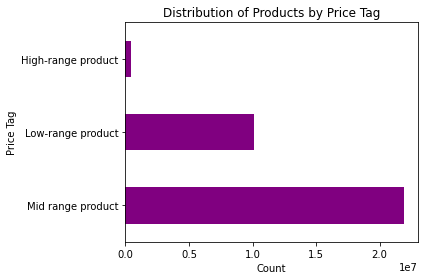

In [6]:
#creates chart for new pirce tags
new_price_tags = orders_products_departments_final['price_range_loc'].value_counts().plot.barh(color = 'purple')
plt.title('Distribution of Products by Price Tag')
plt.xlabel('Count')
plt.ylabel('Price Tag')
plt.tight_layout()

In [7]:
# save new_price_tags png
new_price_tags.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'new_price_tags.png'))

# Distribution of Product Purchases
## Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

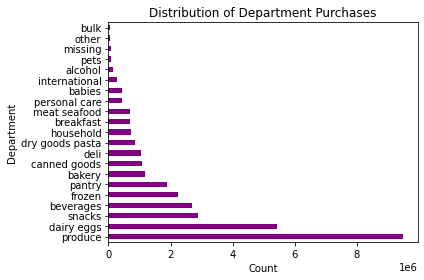

In [8]:
department_popularity = orders_products_departments_final['department'].value_counts().plot.barh(color = 'purple')
plt.title('Distribution of Department Purchases')
plt.xlabel('Count')
plt.ylabel('Department')
plt.tight_layout()

In [9]:
# save department_popularity png
department_popularity.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_popularity.png'))

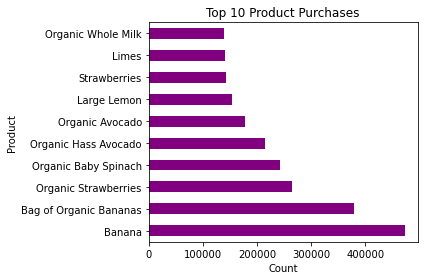

In [10]:
# creates a bar plot of the top 10 best-selling products
top_ten_products = orders_products_departments_final['product_name'].value_counts().head(10).plot.barh(color = 'purple')
plt.title('Top 10 Product Purchases')
plt.xlabel('Count')
plt.ylabel('Product')
plt.tight_layout()

In [11]:
# save top_ten_products png
top_ten_products.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'top_ten_products.png'))

# Distribution of Customers Based on Brand Loyalty
## "What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?"

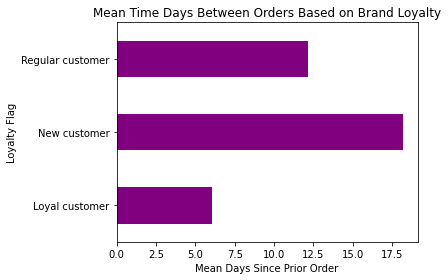

In [14]:
# creates bar chart for Distribution of Customers Based on Brand Loyalty
distr_cust_loyal = orders_products_departments_final.groupby('loyalty_flag').agg({'days_passed_since_last_order': ['mean']}).plot.barh(color = 'purple', legend = False)
plt.title('Mean Time Days Between Orders Based on Brand Loyalty')
plt.xlabel('Mean Days Since Prior Order')
plt.ylabel('Loyalty Flag')
plt.tight_layout()


In [15]:
# save distr_cust_loyal png
distr_cust_loyal.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'distr_cust_loyal.png'))

# Loyalty Status Buying Habits

In [16]:
# creates a dataframe that is grouped by loyalty flage, with total spending & number of orders
loyalty_spend = orders_products_departments_final.groupby('loyalty_flag').agg({'average_spend': ['sum'], 'order_number': ['count']})

In [17]:
# creates a column that can be manipulated for average_spend
loyalty_spend['average_spend_2'] = loyalty_spend['average_spend']

In [18]:
# creates a column that can be manipulated for order_number
loyalty_spend['order_number_2'] = loyalty_spend['order_number']

In [19]:
# calculates the average spend per visit
loyalty_spend['average_spend_per_vist'] = loyalty_spend['average_spend_2']/loyalty_spend['order_number_2']

In [20]:
# returns the result of loyalty_spend
loyalty_spend

,average_spend,order_number,average_spend_2,order_number_2,average_spend_per_vist
,sum,count,,,
loyalty_flag,,,,,
Loyal customer,78480995.4,10293434,78480995.4,10293434,7.624374
New customer,42369283.4,5475359,42369283.4,5475359,7.738175
Regular customer,122005930.1,15890458,122005930.1,15890458,7.677937


## regular customer

In [21]:
# subsets frame with regular customer loyalty status
reg_cust =orders_products_departments_final[orders_products_departments_final['loyalty_flag']=='Regular customer']

In [22]:
# checks head of reg_cust
reg_cust.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,price_range_loc,busiest day,busiest_days,busiest_period_of_day,max_orders,loyalty_flag,average_spend,spender_type,median_days_since_prior_order,Frequent_customer?
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Mid range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Mid range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer
2,4913,Table Water Crackers,78,19,4.4,894221,138,23,5,13,...,Low-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer
3,11759,Organic Simply Naked Pita Chips,107,19,4.4,1986630,138,7,0,12,...,Low-range product,Busiest day,Busiest day,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer
4,13424,Almonds,45,19,4.2,3139998,138,28,6,11,...,Low-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer


In [23]:
# returns shape of reg_cust
reg_cust.shape

(15890458, 32)

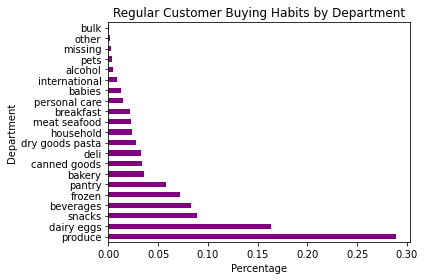

In [24]:
# creates normalized bar chart of reg_cust_chart
reg_cust_chart = (reg_cust['department'].value_counts()/15890458).plot.barh(color = 'purple')
plt.title('Regular Customer Buying Habits by Department')
plt.xlabel('Percentage')
plt.ylabel('Department')
plt.tight_layout()

In [25]:
# saves png for reg_cust_chart
reg_cust_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'reg_cust_chart.png'))

## new customer

In [26]:
# subsets frame with regular customer loyalty status
new_cust =orders_products_departments_final[orders_products_departments_final['loyalty_flag']=='New customer']

In [27]:
# checks head of new_cust
new_cust.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,price_range_loc,busiest day,busiest_days,busiest_period_of_day,max_orders,loyalty_flag,average_spend,spender_type,median_days_since_prior_order,Frequent_customer?
33,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Mid range product,Busiest day,Busiest day,Average orders,5,New customer,7.930208,Low spender,8.0,Frequent customer
34,955,Cheddar Chex Mix,125,19,3.9,147387,709,4,0,21,...,Low-range product,Busiest day,Busiest day,Average orders,5,New customer,7.930208,Low spender,8.0,Frequent customer
35,2491,Star Crunch,61,19,2.1,2322397,709,5,1,21,...,Low-range product,Regularly busy,Busiest day,Average orders,5,New customer,7.930208,Low spender,8.0,Frequent customer
36,8292,100 Calorie Healthy Pop Butter Microwave Pop Corn,23,19,6.2,2322397,709,5,1,21,...,Mid range product,Regularly busy,Busiest day,Average orders,5,New customer,7.930208,Low spender,8.0,Frequent customer
37,10333,Rice Krispies Treats Original Crispy Marshmall...,61,19,3.3,147387,709,4,0,21,...,Low-range product,Busiest day,Busiest day,Average orders,5,New customer,7.930208,Low spender,8.0,Frequent customer


In [28]:
# returns shape of new_cust
new_cust.shape

(5475359, 32)

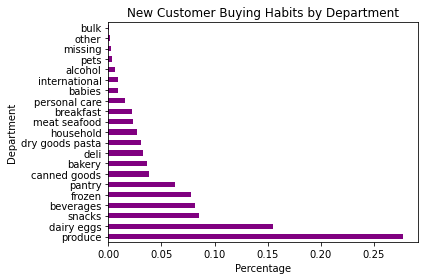

In [29]:
# creates normalized bar chart of new_cust_chart
new_cust_chart = (new_cust['department'].value_counts()/5475359).plot.barh(color = 'purple')
plt.title('New Customer Buying Habits by Department')
plt.xlabel('Percentage')
plt.ylabel('Department')
plt.tight_layout()

In [30]:
# saves png for new_cust_chart
new_cust_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'new_cust_chart.png'))

## loyal customer

In [31]:
# subsets frame with loyal customer loyalty status
loyal_cust =orders_products_departments_final[orders_products_departments_final['loyalty_flag']=='Loyal customer']

In [32]:
# checks head of loyal_cust
loyal_cust.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,price_range_loc,busiest day,busiest_days,busiest_period_of_day,max_orders,loyalty_flag,average_spend,spender_type,median_days_since_prior_order,Frequent_customer?
142,1,Chocolate Sandwich Cookies,61,19,5.8,497193,1480,36,3,13,...,Mid range product,Regularly busy,least busy day,Average orders,43,Loyal customer,5.139394,Low spender,7.0,Frequent customer
143,1,Chocolate Sandwich Cookies,61,19,5.8,1727826,1480,38,4,13,...,Mid range product,Least busy,least busy day,Average orders,43,Loyal customer,5.139394,Low spender,7.0,Frequent customer
144,1,Chocolate Sandwich Cookies,61,19,5.8,2694698,1480,39,2,12,...,Mid range product,Regularly busy,Regularly busy,Average orders,43,Loyal customer,5.139394,Low spender,7.0,Frequent customer
145,8843,Milk Chocolate Covered Raisins,45,19,6.3,2900357,1480,4,3,11,...,Mid range product,Regularly busy,least busy day,Average orders,43,Loyal customer,5.139394,Low spender,7.0,Frequent customer
146,8843,Milk Chocolate Covered Raisins,45,19,6.3,2302341,1480,9,1,13,...,Mid range product,Regularly busy,Busiest day,Average orders,43,Loyal customer,5.139394,Low spender,7.0,Frequent customer


In [33]:
# returns shape of loyal_cust
loyal_cust.shape

(10293434, 32)

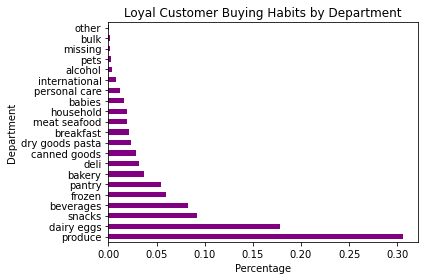

In [34]:
# creates normalized bar chart of loyal_cust_chart
loyal_cust_chart = (loyal_cust['department'].value_counts()/10293434).plot.barh(color = 'purple')
plt.title('Loyal Customer Buying Habits by Department')
plt.xlabel('Percentage')
plt.ylabel('Department')
plt.tight_layout()

In [35]:
# saves png for loyal_cust_chart
loyal_cust_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyal_cust_chart.png'))

# Ordering Habits Based on Family Status
##  Is there a connection between age and family status in terms of ordering habits?!

In [38]:
# returns value counts for family_status
orders_products_departments_final['family_status'].value_counts()

married                             22776125
single                               5330526
divorced/widowed                     2774315
living with parents and siblings     1552064
Name: family_status, dtype: int64

In [39]:
# selects needed columns from orders_products_departments_final
fam_age_ords = orders_products_departments_final[['family_status', 'prices', 'department', 'product_name', 'age', 'days_passed_since_last_order', 'order_id']]

## married customers

In [40]:
# subsets customers who are married
fam_age_ords_married = fam_age_ords [fam_age_ords ['family_status']=='married']

In [41]:
# groups married customers by order id to return the amount spent on a given order
grouped_married = fam_age_ords_married.groupby(['order_id']).agg({'prices':['sum'], 'age': ['max']})

In [42]:
# returns median cost of order
grouped_married['prices'].median()

sum    64.4
dtype: float64

Text(0, 0.5, 'Prices')

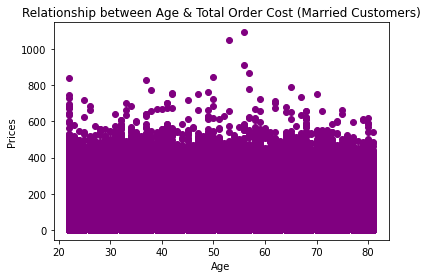

In [43]:
# created scatter plot for the Relationship between Age & Price (Married Customers)
scatter_married = plt.scatter( x = grouped_married['age'], y = grouped_married['prices'], color = 'purple')
plt.title('Relationship between Age & Total Order Cost (Married Customers)')
plt.xlabel('Age')
plt.ylabel('Prices')

In [44]:
#saves scatter_married to png
scatter_married.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scattered_married.png'))

## single customers

In [45]:
# subsets customers who are single
fam_age_ords_single = fam_age_ords [fam_age_ords ['family_status']=='single']

In [46]:
# groups single customers by order id to return the amount spent on a given order
grouped_single = fam_age_ords_single.groupby(['order_id']).agg({'prices':['sum'], 'age': ['max']})

Text(0, 0.5, 'Prices')

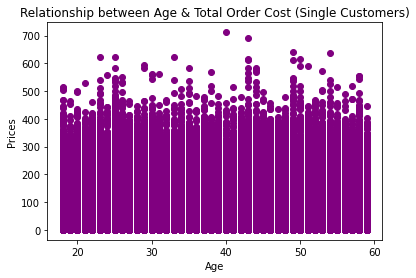

In [47]:
# created scatter plot for the Relationship between Age & Price (Single Customers)
scatter_single = plt.scatter( x = grouped_single['age'], y = grouped_single['prices'], color = 'purple')
plt.title('Relationship between Age & Total Order Cost (Single Customers)')
plt.xlabel('Age')
plt.ylabel('Prices')

In [48]:
# returns median cost of order
grouped_single['prices'].median()

sum    63.9
dtype: float64

In [49]:
#saves scatter_single to png
scatter_single.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scattered_single.png'))

## divorced or widowed customers

In [50]:
# subsets customers who are divorced or widowed
scatter_divorced_widowed = fam_age_ords_divorced_wid = fam_age_ords [fam_age_ords ['family_status']=='divorced/widowed']

In [51]:
# groups divorced/widowed customers by order id to return the amount spent on a given order
grouped_divorced_widowed = scatter_divorced_widowed.groupby(['order_id']).agg({'prices':['sum'], 'age': ['max']})

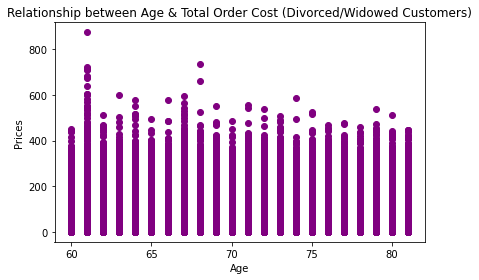

In [52]:
# created scatter plot for the Relationship between Age & Price (Divorced/Widowed Customers)
scatter_divorced_widowed = plt.scatter( x = grouped_divorced_widowed['age'], y = grouped_divorced_widowed['prices'], color = 'purple')
plt.title('Relationship between Age & Total Order Cost (Divorced/Widowed Customers)')
plt.xlabel('Age')
plt.ylabel('Prices')
plt.tight_layout()

In [53]:
#saves scatter_divorced_widowed to png
scatter_divorced_widowed.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_divorced_widowed.png'))

## customers living with parents and siblings 

In [54]:
# subsets customers who are living with parents and siblings
fam_age_ords_w_fam = fam_age_ords [fam_age_ords ['family_status']=='living with parents and siblings']

In [55]:
# groups who are living with parents and siblingss by order id to return the amount spent on a given order
grouped_w_fam  = fam_age_ords_w_fam.groupby(['order_id']).agg({'prices':['sum'], 'age': ['max']})

Text(0, 0.5, 'Prices')

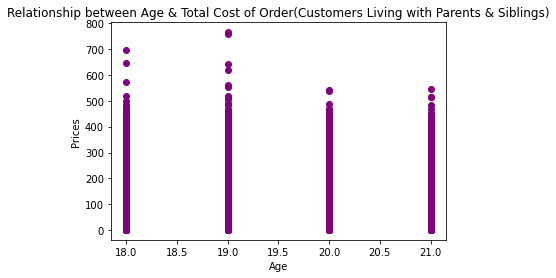

In [56]:
# created scatter plot for the Relationship between Age & Price (Customers Living with Parents & Siblings)
scatter_w_fam= plt.scatter( x = grouped_w_fam ['age'], y = grouped_w_fam ['prices'], color = 'purple')
plt.title('Relationship between Age & Total Cost of Order(Customers Living with Parents & Siblings)')
plt.xlabel('Age')
plt.ylabel('Prices')

In [57]:
#saves scatter_divorced_widowed to png
scatter_w_fam.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_w_fam.png'))

# customers by demographic information
## What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status?

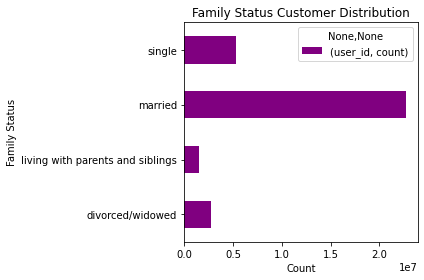

In [58]:
# Creates bar chart for distribution of family status
family_stat_distrib = orders_products_departments_final.groupby('family_status').agg({'user_id': ['count']}).plot.barh(color = 'purple')
plt.title('Family Status Customer Distribution')
plt.xlabel('Count')
plt.ylabel('Family Status')
plt.tight_layout()

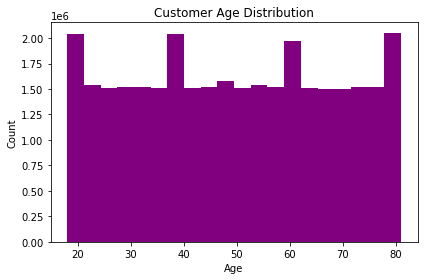

In [59]:
# Creates bar chart for age distribution
age_distrib = orders_products_departments_final['age'].plot.hist(color = 'purple', bins = 20)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()

In [60]:
#saves family_stat_distrib to png
age_distrib.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_distrib.png'))

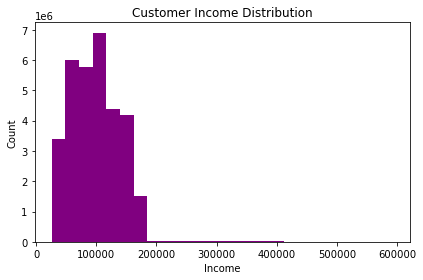

In [61]:
# Creates bar chart for income distribution
income_distrib = orders_products_departments_final['income'].plot.hist(color = 'purple', bins = 25)
plt.title('Customer Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.tight_layout()

In [62]:
#saves income_distrib to png
income_distrib.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_distrib.png'))

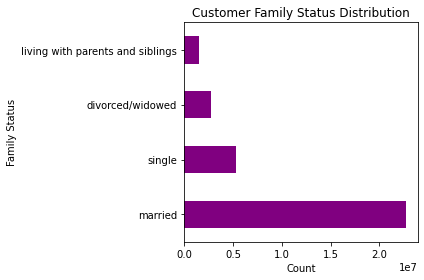

In [63]:
# Creates bar chart for family status
family_stat_distr = orders_products_departments_final['family_status'].value_counts().plot.barh(color = 'purple')
plt.title('Customer Family Status Distribution')
plt.xlabel('Count')
plt.ylabel('Family Status')
plt.tight_layout()

In [64]:
#saves family_stat_distr to png
family_stat_distr.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_stat_distr.png'))